In [1]:
import numpy as np
import pandas as pd
import scipy
from pathlib import Path
from matplotlib import pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

data_dir = Path('/kaggle/input/ventilator-pressure-prediction')

train_df = pd.read_csv(data_dir / 'train.csv')
train_df.head()

,id,breath_id,R,C,time_step,u_in,u_out,pressure
0,1,1,20,50,0.000000,0.083334,0,5.837492
1,2,1,20,50,0.033652,18.383041,0,5.907794
2,3,1,20,50,0.067514,22.509278,0,7.876254
3,4,1,20,50,0.101542,22.808822,0,11.742872
4,5,1,20,50,0.135756,25.355850,0,12.234987


## Pressure distribution as is
It's skewed around 5-10.

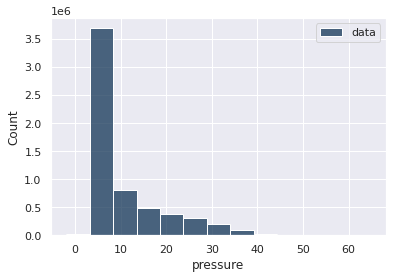

In [2]:
sns.histplot(train_df.pressure, bins=13, color='#123456', label='data')
plt.legend()
plt.show()

## Pressure distribution (Logarithm + Power)
We can transoform the data into bellcurve like shape.

/opt/conda/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


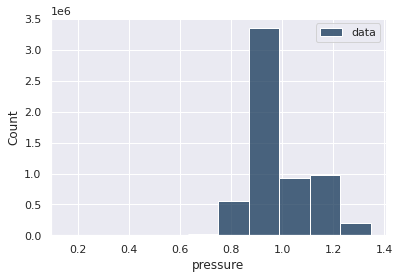

In [3]:
sns.histplot(np.power(np.log10(train_df.pressure), 0.5), bins=10, color='#123456', label='data')
plt.legend()
plt.show()

## Pressure distribution (Box-Cox)

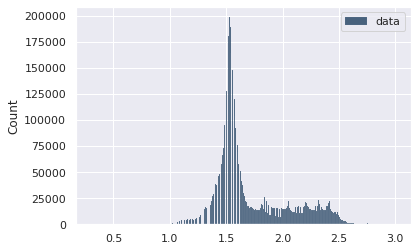

In [4]:
# boxcox accepts only positive values.
positive_pressures = train_df[train_df.pressure >= 0].pressure
boxcox_pressure, _ = (scipy.stats.boxcox(positive_pressures))
p_min = min(boxcox_pressure)
p_max = max(boxcox_pressure)
sns.histplot(boxcox_pressure, color='#123456', label='data', binrange=[0.3, 3])
plt.legend()
plt.show()